<a href="https://colab.research.google.com/github/DiegoAndres23/MLP/blob/main/Red_neuronal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de datos sencilla

### plot datos

X shape: (211, 2)
Y shape: (211, 1)


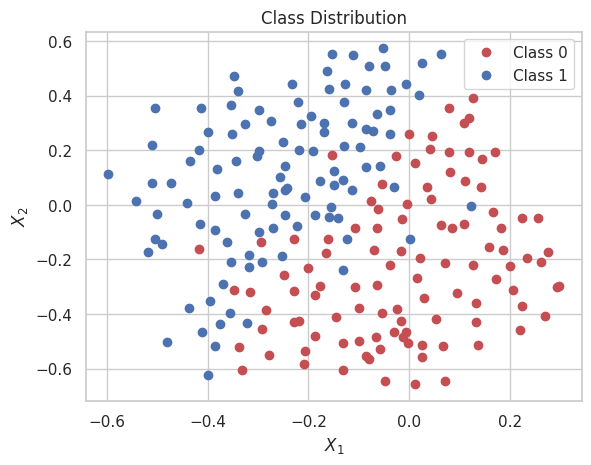

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
# Load the .mat file
data = loadmat('data.mat')

# Access the variables inside
X = data['X']
Y = data['y']
X_val = data['Xval']
Y_val = data['yval']

# Check the content
print("X shape:", X.shape)
print("Y shape:", Y.shape)



# Assuming X and y are numpy arrays and already loaded from data.mat
# X should be of shape (n_samples, 2), y should be (n_samples,)

# Find indices of each class
clas1 = np.where(Y == 0)[0]
clas2 = np.where(Y == 1)[0]

# Plotting
plt.figure()
plt.plot(X[clas1, 0], X[clas1, 1], 'or', label='Class 0')  # red circles
plt.plot(X[clas2, 0], X[clas2, 1], 'ob', label='Class 1')  # blue circles
plt.legend()
plt.title("Class Distribution")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)
plt.show()

### Definir modelo y entrenamiento

In [ ]:
import numpy as np
from scipy.io import loadmat

# Cargar datos
data = loadmat('data.mat')
X = data['X']
Y = data['y']


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def cost_function(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Inicialización
np.random.seed(42)
n_input = X.shape[1]
n_hidden1 = 5
n_hidden2 = 3
n_output = 1

w1 = np.random.randn(n_input, n_hidden1)
w2 = np.random.randn(n_hidden1, n_hidden2)
w3 = np.random.randn(n_hidden2, n_output)

eta = 10**(-2)
epochs = 30000

# Entrenamiento
for i in range(epochs):
    # FORWARD
    z1 = X @ w1
    a1 = sigmoid(z1)
    z2 = a1 @ w2
    a2 = sigmoid(z2)
    z3 = a2 @ w3
    a3 = sigmoid(z3)

    # COSTE
    loss = cost_function(Y, a3)

    # BACKPROP
    dz3 = a3 - Y
    dw3 = a2.T @ dz3 / len(X)

    dz2 = (dz3 @ w3.T) * sigmoid_derivative(a2)
    dw2 = a1.T @ dz2 / len(X)

    dz1 = (dz2 @ w2.T) * sigmoid_derivative(a1)
    dw1 = X.T @ dz1 / len(X)

    # ACTUALIZACIÓN
    w3 -= eta * dw3
    w2 -= eta * dw2
    w1 -= eta * dw1

    if i % 1000 == 0:
        print(f"Iter {i}, Loss: {loss:.4f}")

# Predicción final
y_pred = (a3 > 0.5).astype(int)
acc = np.mean(y_pred == Y)
print(f"\nAccuracy in train: {100*acc}%")


Iter 0, Loss: 0.6748
Iter 1000, Loss: 0.6693
Iter 2000, Loss: 0.6620
Iter 3000, Loss: 0.6520
Iter 4000, Loss: 0.6381
Iter 5000, Loss: 0.6185
Iter 6000, Loss: 0.5916
Iter 7000, Loss: 0.5566
Iter 8000, Loss: 0.5156
Iter 9000, Loss: 0.4736
Iter 10000, Loss: 0.4349
Iter 11000, Loss: 0.4011
Iter 12000, Loss: 0.3722
Iter 13000, Loss: 0.3476
Iter 14000, Loss: 0.3267
Iter 15000, Loss: 0.3092
Iter 16000, Loss: 0.2947
Iter 17000, Loss: 0.2829
Iter 18000, Loss: 0.2733
Iter 19000, Loss: 0.2656
Iter 20000, Loss: 0.2594
Iter 21000, Loss: 0.2544
Iter 22000, Loss: 0.2503
Iter 23000, Loss: 0.2470
Iter 24000, Loss: 0.2442
Iter 25000, Loss: 0.2420
Iter 26000, Loss: 0.2401
Iter 27000, Loss: 0.2385
Iter 28000, Loss: 0.2372
Iter 29000, Loss: 0.2361

Accuracy in train: 92.41706161137441%


### Evaluación de métricas

In [ ]:
z1 = X_val @ w1
a1 = sigmoid(z1)
z2 = a1 @ w2
a2 = sigmoid(z2)
z3 = a2 @ w3
a3 = sigmoid(z3)

y_pred = (a3 > 0.5).astype(int)
acc = np.mean(y_pred == Y_val)
print(f"\nAccuracy in validation: {100*acc}%")


Accuracy in validation: 93.5%


### Ploteo final

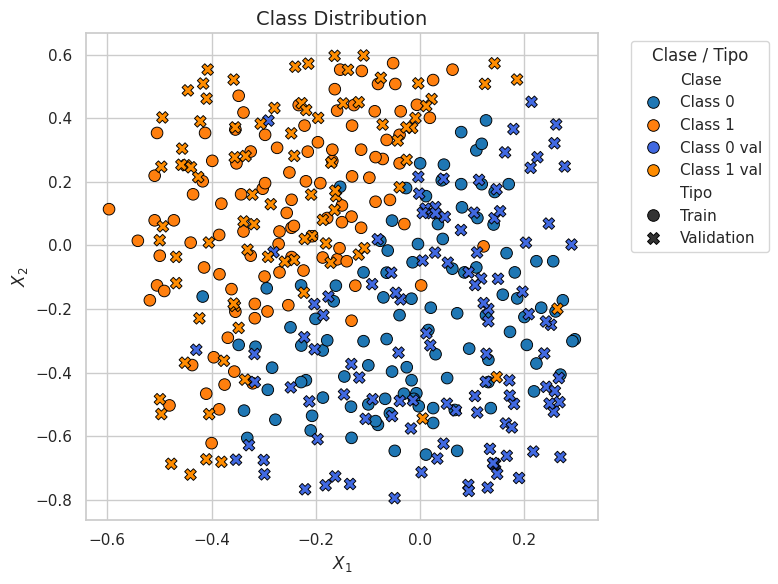

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Índices por clase
clas1_val = np.where(Y_val == 0)[0]
clas2_val = np.where(Y_val == 1)[0]
clas1 = np.where(Y == 0)[0]
clas2 = np.where(Y == 1)[0]

# Crear un DataFrame unificado
df = pd.DataFrame({
    'X1': np.concatenate([X[clas1, 0], X[clas2, 0], X_val[clas1_val, 0], X_val[clas2_val, 0]]),
    'X2': np.concatenate([X[clas1, 1], X[clas2, 1], X_val[clas1_val, 1], X_val[clas2_val, 1]]),
    'Clase': (['Class 0'] * len(clas1)) + (['Class 1'] * len(clas2)) +
             (['Class 0 val'] * len(clas1_val)) + (['Class 1 val'] * len(clas2_val)),
    'Tipo': (['Train'] * (len(clas1) + len(clas2))) + (['Validation'] * (len(clas1_val) + len(clas2_val)))
})

# Paleta de colores para clases
palette = {
    'Class 0': 'tab:blue',
    'Class 1': 'tab:orange',
    'Class 0 val': 'royalblue',
    'Class 1 val': 'darkorange'
}

# Estilo
sns.set(style="whitegrid", context="notebook")

# Crear figura
plt.figure(figsize=(8, 6))

# Graficar
sns.scatterplot(
    data=df,
    x="X1",
    y="X2",
    hue="Clase",
    style="Tipo",
    palette=palette,
    s=70,
    edgecolor="black"
)

# Detalles del gráfico
plt.title("Class Distribution", fontsize=14)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(title="Clase / Tipo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Distribución de datos compleja

### Definición de datos

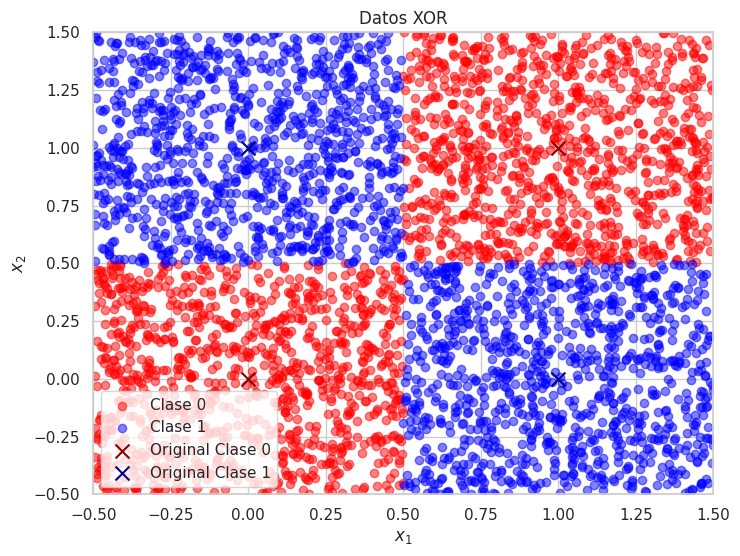

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Datos originales XOR
X_original = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_original = np.array([0, 1, 1, 0])  # Clases XOR

# 2. Generar datos sintéticos en cada región (100 puntos por clase)
np.random.seed(42)
n_points = 1000
noise = 0.5  # Radio de dispersión alrededor de los puntos originales

# Región 1: Clase 0 (alrededor de (0, 0))
X_00 = np.random.uniform(low=[-noise, -noise], high=[noise, noise], size=(n_points, 2))
# Región 2: Clase 1 (alrededor de (0, 1))
X_01 = np.random.uniform(low=[-noise, 1-noise], high=[noise, 1+noise], size=(n_points, 2))
# Región 3: Clase 1 (alrededor de (1, 0))
X_10 = np.random.uniform(low=[1-noise, -noise], high=[1+noise, noise], size=(n_points, 2))
# Región 4: Clase 0 (alrededor de (1, 1))
X_11 = np.random.uniform(low=[1-noise, 1-noise], high=[1+noise, 1+noise], size=(n_points, 2))

# Combinar todos los datos sintéticos
X_synthetic = np.vstack([X_00, X_01, X_10, X_11])
y_synthetic = np.hstack([
    np.zeros(n_points),  # Clase 0 para X_00
    np.ones(n_points),   # Clase 1 para X_01
    np.ones(n_points),   # Clase 1 para X_10
    np.zeros(n_points)   # Clase 0 para X_11
])

# 3. Graficar con Matplotlib (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_synthetic[y_synthetic == 0][:, 0], X_synthetic[y_synthetic == 0][:, 1],
            color='red', label='Clase 0', alpha=0.5)
plt.scatter(X_synthetic[y_synthetic == 1][:, 0], X_synthetic[y_synthetic == 1][:, 1],
            color='blue', label='Clase 1', alpha=0.5)
plt.scatter(X_original[y_original == 0][:, 0], X_original[y_original == 0][:, 1],
            color='darkred', marker='x', s=100, label='Original Clase 0')
plt.scatter(X_original[y_original == 1][:, 0], X_original[y_original == 1][:, 1],
            color='darkblue', marker='x', s=100, label='Original Clase 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Datos XOR')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()


### Definir modelo y entrenamiento

Entrenando red neuronal para XOR...
Iter    0, Loss: 0.712793
Iter 1000, Loss: 0.593553
Iter 2000, Loss: 0.206363
Iter 3000, Loss: 0.132674
Iter 4000, Loss: 0.107714
Iter 5000, Loss: 0.095077
Iter 6000, Loss: 0.087047
Iter 7000, Loss: 0.081370
Iter 8000, Loss: 0.077125
Iter 9000, Loss: 0.073819
Resultados finales:
Loss final: 0.071151

Accuracy: 99.20%


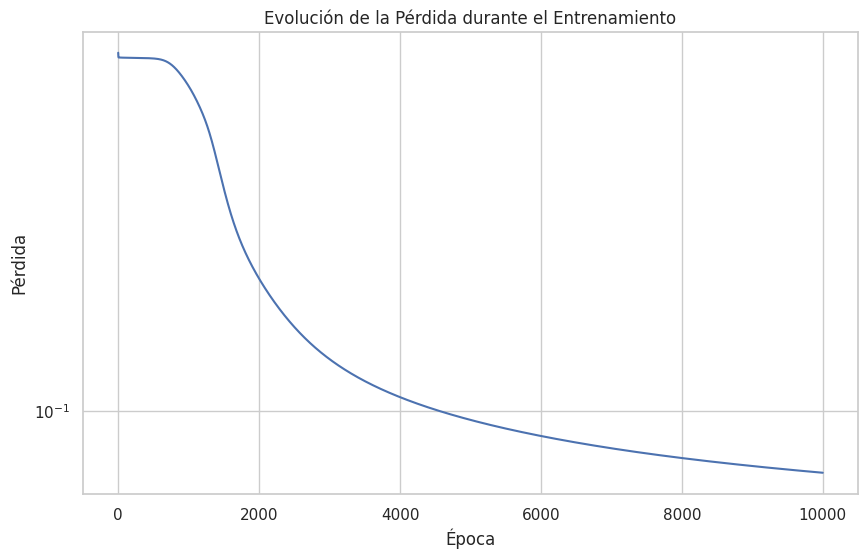

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación y costo
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def cost_function(y_true, y_pred):
    # Binary cross-entropy con estabilidad numérica
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Datos XOR
X = np.array([[
    0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])



Y = np.array([[
    0],
              [1],
              [1],
              [0]])
X = X_synthetic
Y = y_synthetic.reshape(-1, 1)
# Inicialización de parámetros
np.random.seed(42)
input_size = 2
hidden_size = 4  # Capa oculta con 4 neuronas
output_size = 1

# Inicialización Xavier/Glorot para mejor convergencia
w1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / (input_size + hidden_size))
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / (hidden_size + output_size))
b2 = np.zeros((1, output_size))

# Hiperparámetros
eta = 0.5  # Tasa de aprendizaje más alta para XOR
epochs = 10000
loss_history = []

print("Entrenando red neuronal para XOR...")
print("=" * 50)

# Entrenamiento
for i in range(epochs):
    # Forward propagation
    z1 = X @ w1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ w2 + b2
    a2 = sigmoid(z2)

    # Costo
    loss = cost_function(Y, a2)
    loss_history.append(loss)

    # Backpropagation
    dz2 = a2 - Y
    dw2 = a1.T @ dz2 / len(X)
    db2 = np.mean(dz2, axis=0, keepdims=True)

    dz1 = (dz2 @ w2.T) * sigmoid_derivative(z1)
    dw1 = X.T @ dz1 / len(X)
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # Actualizar parámetros
    w2 -= eta * dw2
    b2 -= eta * db2
    w1 -= eta * dw1
    b1 -= eta * db1

    if i % 1000 == 0:
        print(f"Iter {i:4d}, Loss: {loss:.6f}")

# Resultados finales
print("=" * 50)
print("Resultados finales:")
print(f"Loss final: {loss:.6f}")

# Predicciones
z1 = X @ w1 + b1
a1 = sigmoid(z1)
z2 = a1 @ w2 + b2
a2 = sigmoid(z2)
y_pred = (a2 > 0.5).astype(int)

# print("\nPredicciones:")
# print("Input | Target | Prediction | Probability")
# print("-" * 40)
# for i in range(len(X)):
#     print(f"  {X[i]}  |   {Y[i][0]}    |     {y_pred[i][0]}      |    {a2[i][0]:.4f}")

acc = np.mean(y_pred == Y)
print(f"\nAccuracy: {acc * 100:.2f}%")

# Gráfica de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

# Visualización de la función aprendida


### Plot region de desición

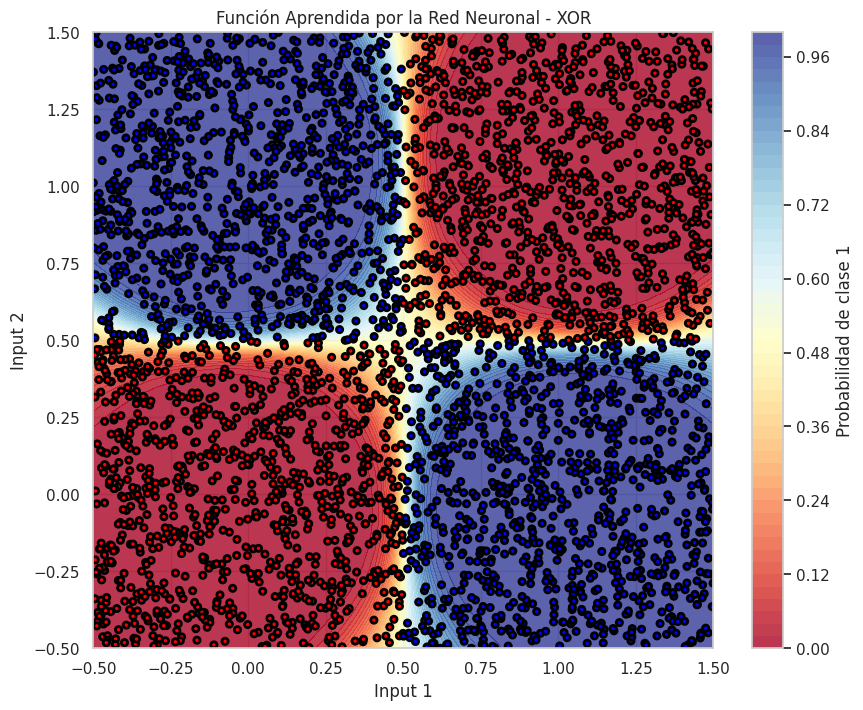


Pesos finales:
w1 shape: (2, 4)
w2 shape: (4, 1)
w1:
[[ 6.08935148 -5.88482142 -5.53967293  5.60258916]
 [-5.70288508 -5.47962207  5.94575213  6.10628783]]
w2:
[[-13.03711569]
 [ 13.79618785]
 [-14.51878015]
 [ 14.26505675]]


In [ ]:
def plot_decision_boundary():
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                         np.linspace(-0.5, 1.5, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass para toda la grid
    z1_grid = grid @ w1 + b1
    a1_grid = sigmoid(z1_grid)
    z2_grid = a1_grid @ w2 + b2
    a2_grid = sigmoid(z2_grid)
    Z = a2_grid.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Probabilidad de clase 1')

    # Plot puntos de datos
    colors = ['red' if y == 0 else 'blue' for y in Y.flatten()]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=20, edgecolors='black', linewidth=2)

    plt.title('Función Aprendida por la Red Neuronal - XOR')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.show()

plot_decision_boundary()

# Pesos finales
print("\nPesos finales:")
print(f"w1 shape: {w1.shape}")
print(f"w2 shape: {w2.shape}")
print(f"w1:\n{w1}")
print(f"w2:\n{w2}")

### Métricas y evaluación

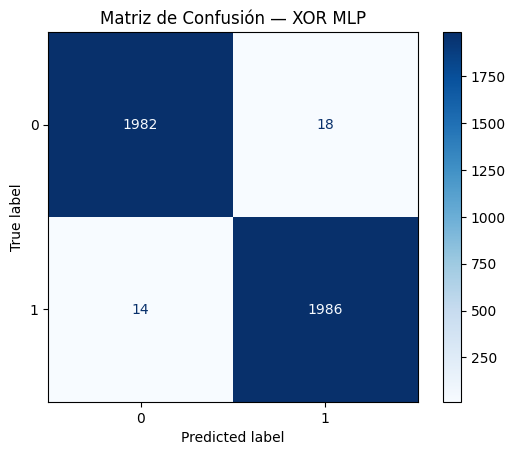

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2000
         1.0       0.99      0.99      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(Y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión — XOR MLP")
plt.show()
print(classification_report(Y, y_pred))

# Playground

https://playground.tensorflow.org/